# Robomission competition progress

- [Baseline 1] Global average model | RMSE 1.128
- [Baseline 2] Item average model | RMSE 0.849

### Time-series
- Observation: Mean times differ based on which hour/time of the day a task is being solved
- Idea: Introduce `hour` and 'time of the day' features (`isMorning`, etc.)
- Models: `GlobalAvgModelHour`, `ItemAvgModelHour`, `ItemAvgModelTimeOfTheDay`
- Results:
[Baseline] 1. Item average model | RMSE 0.849

### Task-oriented
- Better tasks to start with

### Student-oriented

### Outlier removal and distribution transformations

### Linear models
- Linear Regression
- Ridge Regression
- Lasso Regression
    - improvement: Use only for seen students, otherwise use time mean
- SVR

## Feature engineering:
- Try to model learning:
    - sigmoid function with argument: number of solved tasks per given concept
    - forgetting
- 

In [296]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from robomission import *
from time_series_models import *
from task_models import *
from student_models import *
from regression_models import *
from outlier_models import *
from helpers import *
pd.options.mode.chained_assignment = None 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
DATA = load_attempts()
df_train = DATA['attempts'].copy()
df_test = DATA['attempts_reporting'].copy()
train = df_preprocess_basic(df_train)
test = df_preprocess_basic(df_test)
all_evals = {}

In [30]:
models = [
    GlobalAvgModelHour(),
    ItemAvgModelHour(),
    ItemAvgModelHourWeighted(),
    ItemAvgModelTimeOfTheDay(),
    ItemAvgModelTimeOfTheDayWeighted(),
    ItemAvgModelMonths(),
    ItemAvgModelSeasons(),
    ItemAvgModelWeekend(),
    ItemAvgModelSchool()
]
%time eval_results_simple_timeseries = eval_models_for_seminar_report(models, train, test)

Evaluating GlobalAvgModelHour().
Scenario: 'as-observed'.
Results: RMSE 1.128

Evaluating ItemAvgModelHour().
Scenario: 'as-observed'.
Results: RMSE 0.859

Evaluating ItemAvgModelHourWeighted().
Scenario: 'as-observed'.
Results: RMSE 0.848

Evaluating ItemAvgModelTimeOfTheDay().
Scenario: 'as-observed'.
Results: RMSE 0.851

Evaluating ItemAvgModelTimeOfTheDayWeighted().
Scenario: 'as-observed'.
Results: RMSE 0.849

Evaluating ItemAvgModelMonths().
Scenario: 'as-observed'.
Results: RMSE 0.885

Evaluating ItemAvgModelSeasons().
Scenario: 'as-observed'.
Results: RMSE 0.861

Evaluating ItemAvgModelWeekend().
Scenario: 'as-observed'.
Results: RMSE 0.850

Evaluating ItemAvgModelSchool().
Scenario: 'as-observed'.
Results: RMSE 0.851

Wall time: 6min 52s


In [40]:
# todo - miscs
models = [
    ItemAvgModelStart()
]
%time eval_results_simple_task = eval_models_for_seminar_report(models, train, test)

Evaluating ItemAvgModelStart().
Scenario: 'as-observed'.
Results: RMSE 0.849

Wall time: 27 s


In [32]:
# todo - miscs
models = [
    ItemAvgModelUserSolvedCount(),
    UserAvgModel(),
    UserAvgModelHistory(),
    UserAvgModelHistoryHandicapOnFirstTaskEver()
]
%time eval_results_simple_student = eval_models_for_seminar_report(models, train, test)

Evaluating ItemAvgModelUserSolvedCount().
Scenario: 'as-observed'.
Results: RMSE 0.853

Evaluating UserAvgModel().
Scenario: 'as-observed'.
Results: RMSE 1.128

Evaluating UserAvgModelHistory().
Scenario: 'as-observed'.
Results: RMSE 0.852

Evaluating UserAvgModelHistoryHandicapOnFirstTaskEver().
Scenario: 'as-observed'.
-1.1815847459563704 instd. of -1.050297551961218
0.3350238545777583 instd. of 0.5741139016709
0.9808664942675174 instd. of 1.5693863908280279
Results: RMSE 0.852

Wall time: 2min 1s


In [79]:
models = [
    LassoRegressionModel()
]
%time eval_results_simple = eval_models_for_seminar_report(models, train, test)

Evaluating LassoRegressionModel().
Scenario: 'as-observed'.
Results: RMSE 0.982

Wall time: 26.3 s


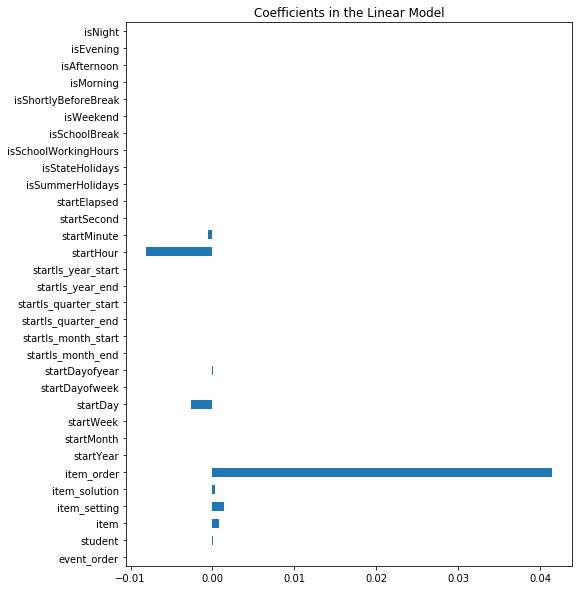

In [80]:
feature_importances(models[0].debug()[0].coef_, models[0].debug()[1])

In [10]:
train_ = train.drop(get_redundant_columns(), axis=1)
test_ = test.drop(get_redundant_columns(), axis=1)

In [11]:
models = [
    LassoRegressionModel()
]
%time eval_results_simple = eval_models_for_seminar_report(models, train_, test_)

Evaluating LassoRegressionModel().
Scenario: 'as-observed'.
Results: RMSE 0.981

Wall time: 27.3 s


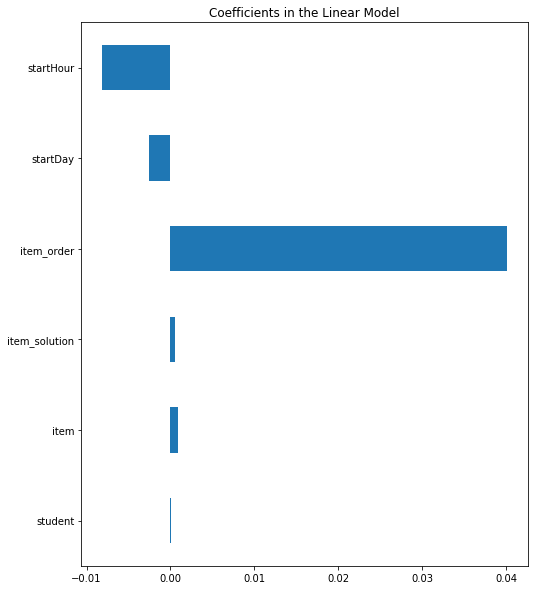

In [12]:
feature_importances(models[0].debug()[0].coef_, models[0].debug()[1])

In [19]:
train_fe = pd.read_csv("train_eng.csv")
train_fe = train_fe.drop(["item_solution"], axis=1)
train_fe = train_fe.drop(get_redundant_columns(), axis=1)
test_fe = pd.read_csv("test_eng.csv")
test_fe = test_fe.drop(["item_solution"], axis=1)
test_fe = test_fe.drop(get_redundant_columns(), axis=1)

In [244]:
train_isConcept = train_.copy()
train_isConcept["isColor"] = train_fe["isColor"].values
train_isConcept["isLoop"] = train_fe["isLoop"].values
train_isConcept["isPosition"] = train_fe["isPosition"].values

test_isConcept = test_.copy()
test_isConcept["isColor"] = test_fe["isColor"].values
test_isConcept["isLoop"] = test_fe["isLoop"].values
test_isConcept["isPosition"] = test_fe["isPosition"].values

In [249]:
train_isConcept["isColor"].value_counts()

False    89413
True      8813
Name: isColor, dtype: int64

In [251]:
train_isConcept["isPosition"].value_counts()

False    96039
True      2187
Name: isPosition, dtype: int64

In [260]:
train_isConcept["isLoop"].value_counts()

False    55446
True     42780
Name: isLoop, dtype: int64

In [246]:
models = [
    LassoRegressionModel()
]
%time eval_results_simple_eng = eval_models_for_seminar_report(models, train_isConcept, test_isConcept)

Evaluating LassoRegressionModel().
Scenario: 'as-observed'.
Results: RMSE 0.979

Wall time: 29.7 s


In [247]:
feature_importances(models[0].debug()[0].coef_, models[0].debug()[1])

In [252]:
train_isConcept["knowsColor"] = train_fe["knowsColor"].values
train_isConcept["knowsLoop"] = train_fe["knowsLoop"].values
train_isConcept["knowsPosition"] = train_fe["knowsPosition"].values

test_isConcept["knowsColor"] = test_fe["knowsColor"].values
test_isConcept["knowsLoop"] = test_fe["knowsLoop"].values
test_isConcept["knowsPosition"] = test_fe["knowsPosition"].values

In [263]:
train_isConcept["knowsColor"].plot.hist(60)

In [253]:
models = [
    LassoRegressionModel()
]
%time eval_results_simple_eng = eval_models_for_seminar_report(models, train_isConcept, test_isConcept)

Evaluating LassoRegressionModel().
Scenario: 'as-observed'.
Results: RMSE 0.971

Wall time: 29.9 s


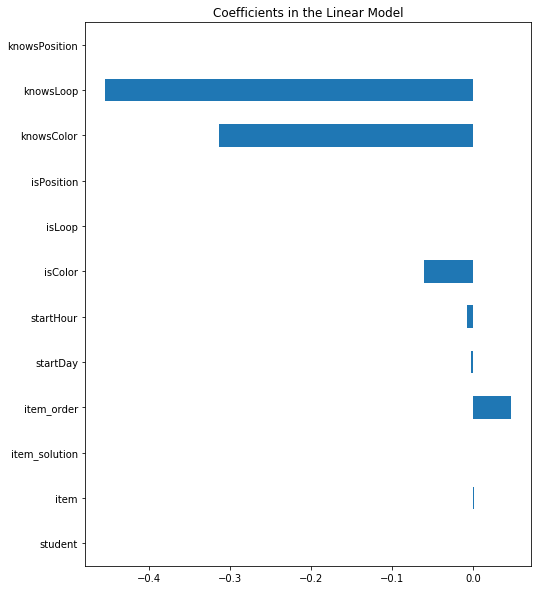

In [255]:
feature_importances(models[0].debug()[0].coef_, models[0].debug()[1])

In [264]:
train_fe_2

id  student  item                             start  solved  \
0           4       29     2  2017-11-10 12:20:05.152265+00:00    True   
1           5       29    12  2017-11-10 12:20:32.155447+00:00    True   
2           6       29    10  2017-11-10 12:20:54.080259+00:00    True   
3           7       29    14  2017-11-10 12:21:06.966330+00:00    True   
4           8       29    11  2017-11-10 12:21:33.061485+00:00    True   
5           9       29     1  2017-11-10 12:22:14.768707+00:00    True   
6          10       29     3  2017-11-10 12:22:42.455442+00:00    True   
7          11       29    49  2017-11-10 12:23:06.409399+00:00    True   
8          12       29    17  2017-11-10 12:23:23.127216+00:00    True   
9          13       29     8  2017-11-10 12:24:07.602156+00:00    True   
10         16      584     2  2017-11-12 08:33:42.535936+00:00    True   
11         17      584    31  2017-11-12 08:36:17.796933+00:00    True   
12         18      584    12  2017-11-12 08:37:31.844203+00:00    True   
13         19      584     8  2017-11-12 08:38:23.728383+00:00    True   
14         20      584     6  2017-11-12 08:39:19.885045+00:00    True   
15         21      584    13  2017-11-12 08:42:03.346800+00:00    True   
16         22      584    23  2017-11-12 08:45:31.357977+00:00    True   
17         23      584    21  2017-11-12 08:47:03.994079+00:00    True   
18         24      584     3  2017-11-12 08:48:30.172061+00:00    True   
19         25      584    53  2017-11-12 08:49:58.723520+00:00    True   
20         26      584    17  2017-11-12 08:50:37.636168+00:00    True   
21         27      584    50  2017-11-12 08:53:25.954833+00:00    True   
22         28      584    41  2017-11-12 08:57:39.741460+00:00    True   
23         30      584    37  2017-11-12 08:59:24.912358+00:00    True   
24         31      584    60  2017-11-12 09:00:34.676681+00:00    True   
25         32      584    55  2017-11-12 09:06:42.290558+00:00    True   
26         34      769    31  2017-11-12 23:27:20.552363+00:00    True   
27         35      769    49  2017-11-12 23:29:22.225442+00:00    True   
28         38      909    26  2017-11-13 10:27:27.617132+00:00   False   
29         39      917    26  2017-11-13 10:58:19.666306+00:00   False   
...       ...      ...   ...                               ...     ...   
98196  107632    16373     8  2019-03-30 09:29:22.214979+00:00    True   
98197  107633    16373    12  2019-03-30 09:30:06.975628+00:00    True   
98198  107634    16373     6  2019-03-30 09:30:40.406525+00:00    True   
98199  107635    16373    23  2019-03-30 09:32:04.423908+00:00    True   
98200  107636    16373    19  2019-03-30 09:33:13.821232+00:00    True   
98201  107637    16373    79  2019-03-30 09:36:45.398781+00:00    True   
98202  107638    16373    11  2019-03-30 09:38:23.376115+00:00    True   
98203  107639    16373     1  2019-03-30 09:39:01.585215+00:00    True   
98204  107640    16373    71  2019-03-30 09:40:40.440520+00:00    True   
98205  107641    16373    70  2019-03-30 09:42:05.810300+00:00    True   
98206  107642    16373    76  2019-03-30 09:43:57.187639+00:00    True   
98207  107643    16374    51  2019-03-31 09:43:57.077720+00:00    True   
98208  107644    16374    44  2019-03-31 09:44:11.708501+00:00    True   
98209  107645    16374    67  2019-03-31 09:44:24.762726+00:00    True   
98210  107646    16374    10  2019-03-31 09:44:43.344046+00:00    True   
98211  107647    16374    12  2019-03-31 09:44:55.601362+00:00    True   
98212  107648    16374    79  2019-03-31 09:45:12.104916+00:00    True   
98213  107649    16374    19  2019-03-31 09:46:53.475309+00:00    True   
98214  107650    16374     1  2019-03-31 09:48:03.797545+00:00    True   
98215  107651    16374    84  2019-03-31 09:48:38.842879+00:00    True   
98216  107652    16374    21  2019-03-31 09:49:35.940793+00:00    True   
98217  107653    16374     3  2019-03-31 09:50:24.700229+00:00    True   
98218  107654  

In [271]:
train_concept_skill_time = train_isConcept.copy()
train_concept_skill_time["itemDifficulty"] = train_fe_2["itemDifficulty"].values

test_concept_skill_time = test_isConcept.copy()
test_concept_skill_time["itemDifficulty"] = test_fe_2["itemDifficulty"].values


In [274]:
train_concept_skill_time["itemDifficulty"].value_counts()

1    53918
0    43183
2     1125
Name: itemDifficulty, dtype: int64

In [272]:
models = [
    LassoRegressionModel()
]
%time eval_results_simple_eng = eval_models_for_seminar_report(models, train_concept_skill_time, test_concept_skill_time)

Evaluating LassoRegressionModel().
Scenario: 'as-observed'.
Results: RMSE 0.885

Wall time: 28.2 s


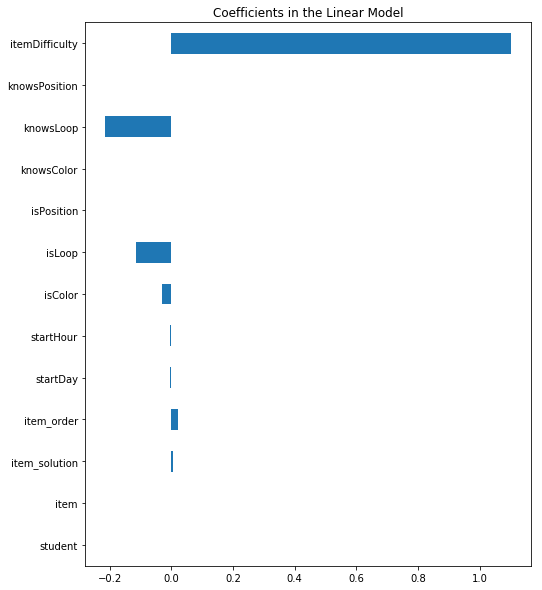

In [273]:
feature_importances(models[0].debug()[0].coef_, models[0].debug()[1])

In [215]:
train_fe_2 = pd.read_csv("train_f.csv")
#train_fe_2 = train_fe_2.drop(["item_solution"], axis=1)
#train_fe_2 = train_fe_2.drop(get_redundant_columns(), axis=1)
test_fe_2 = pd.read_csv("test_f.csv")
#test_fe_2 = test_fe_2.drop(["item_solution"], axis=1)
#test_fe_2 = test_fe_2.drop(get_redundant_columns(), axis=1)

In [226]:
models = [
    LassoRegressionModel()
]
%time eval_results_simple_eng_2 = eval_models_for_seminar_report(models, train_fe_2_, test_fe_2_)

Evaluating LassoRegressionModel().
Scenario: 'as-observed'.
Results: RMSE 1.030

Wall time: 27.2 s


In [225]:
train_fe_2_ = train_fe_2.drop(["itemDifficulty"], axis=1)
test_fe_2_ = test_fe_2.drop(["itemDifficulty"], axis=1)

In [223]:
models[0].debug()[0].coef_[:-1]

array([ 1.52412209e-06, -2.15921901e-05,  1.37476274e-04, -1.02809506e-02,
        0.00000000e+00,  0.00000000e+00,  7.23632780e-08,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00])

In [227]:
feature_importances(models[0].debug()[0].coef_, models[0].debug()[1])

In [26]:
train_fe_2 = train_fe_2.drop(["knowsPosition", "longestTimeChance", "isPosition", "isLoop", "id"], axis=1)
test_fe_2 = test_fe_2.drop(["knowsPosition", "longestTimeChance", "isPosition", "isLoop", "id"], axis=1)

In [27]:
models = [
    LassoRegressionModel()
]
%time eval_results_simple_eng_3 = eval_models_for_seminar_report(models, train_fe_2, test_fe_2)

Evaluating LassoRegressionModel().
Scenario: 'as-observed'.
Results: RMSE 0.968

Wall time: 27.3 s


In [28]:
feature_importances(models[0].debug()[0].coef_, models[0].debug()[1])

In [302]:
models = [
    ItemAvgModelBoxCoxWorseTasksToStartWithLinReg()
]
%time eval_results_simple_or = eval_models_for_seminar_report(models, train, test)

Evaluating ItemAvgModelBoxCoxWorseTasksToStartWithLinReg().
Scenario: 'as-observed'.
Results: RMSE 0.849

Wall time: 32.6 s


In [289]:
models = [
    ItemAvgModelBoxCox(),
    ItemAvgModelBoxCoxStart(),
    ItemAvgModelOutliersRemoval(),
    ItemAvgModelOutliersRemovalCombination()
]
%time eval_results_simple_or = eval_models_for_seminar_report(models, train, test)

Evaluating ItemAvgModelBoxCox().
Scenario: 'as-observed'.
Results: RMSE 0.847

Evaluating ItemAvgModelBoxCoxStart().
Scenario: 'as-observed'.
Results: RMSE 0.847

Evaluating ItemAvgModelOutliersRemoval().
Scenario: 'as-observed'.
Results: RMSE 0.849

Evaluating ItemAvgModelOutliersRemovalCombination().
Scenario: 'as-observed'.
Results: RMSE 0.848

Wall time: 2min


In [ ]:
train_concept_skill_time

In [288]:
models = [
    ItemAvgModelBoxCox(),
    ItemAvgModelBoxCoxStart(),
    ItemAvgModelBoxCoxPerItem(),
    ItemAvgModelOutliersRemoval(),
    ItemAvgModelOutliersRemovalCombination()
]
%time eval_results_simple_or_2 = eval_models_for_seminar_report(models, train_concept_skill_time, test_concept_skill_time)

Evaluating ItemAvgModelBoxCox().
Scenario: 'as-observed'.
Results: RMSE 0.847

Evaluating ItemAvgModelBoxCoxStart().
Scenario: 'as-observed'.
Results: RMSE 0.847

Evaluating ItemAvgModelBoxCoxPerItem().
Scenario: 'as-observed'.


IndexError: invalid index to scalar variable.

In [ ]:
'''
SimpleRegressionModel(),
LinearRegressionModelOnlySeen(),
RidgeRegressionModelOnlySeen(),
LassoRegressionModelOnlySeen(),
'''

In [87]:
np.array(test_x[:1].T.values).shape

(33, 1)

In [150]:
models = [
    XGBoostRegressionModelOnlySeen()
]
%time eval_results_regression = eval_models_for_seminar_report(models, train, test)

Evaluating XGBoostRegressionModelOnlySeen().
Scenario: 'as-observed'.
[00:13:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Results: RMSE 0.894

Wall time: 22min 41s


In [62]:
pc = ['time', 'start', 'response_time_sec', 'executions', 'edits', 'program']
train_x = train[train["solved"] == True]
train_y = train_x["time"]
train_x = train_x.drop(pc, axis=1)

test_x = test[test["solved"] == True]
test_y = test_x["time"]
test_x = test_x.drop(pc, axis=1)

In [55]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_x, train_y, early_stopping_rounds=5, eval_set=[(test_x, test_y)], verbose=False)

[23:06:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [69]:
X_tr = train_x[:train_x.shape[0]-10000]
y_tr = train_y[:train_x.shape[0]-10000]
X_eval = train_x[train_x.shape[0]-10000:]
y_eval = train_y[train_x.shape[0]-10000:]
X_tr.shape, y_tr.shape, y_eval.shape

((76483, 33), (76483,), (10000,))

In [70]:
my_model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model_2.fit(X_tr, y_tr, early_stopping_rounds=5, eval_set=[(X_eval, y_eval)], verbose=False)

C:\Users\terez\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\terez\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[23:17:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [119]:
my_model_2.predict(test_x[:1])

array([3.4488277], dtype=float32)

In [139]:
test_x[:1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 107662 to 107662
Data columns (total 33 columns):
event_order              1 non-null int64
student                  1 non-null int64
item                     1 non-null int64
item_setting             1 non-null int8
item_solution            1 non-null int8
item_order               1 non-null int8
solved                   1 non-null bool
startYear                1 non-null int64
startMonth               1 non-null int64
startWeek                1 non-null int64
startDay                 1 non-null int64
startDayofweek           1 non-null int64
startDayofyear           1 non-null int64
startIs_month_end        1 non-null bool
startIs_month_start      1 non-null bool
startIs_quarter_end      1 non-null bool
startIs_quarter_start    1 non-null bool
startIs_year_end         1 non-null bool
startIs_year_start       1 non-null bool
startHour                1 non-null int64
startMinute              1 non-null int64
startSecond      

In [149]:
for i_attempt, attempt in test_x.iterrows():
    #a = attempt.to_frame()
    a = attempt.to_frame().T
    a.index.name = "id"
    #a = a.set_index("id")
    a = a.astype('bool')
    a = a.astype({'student': 'int64', "event_order": 'int64', "item": "int64"})
    a = a.astype({'item': 'int8', "item_setting": 'int8', "item_solution": "int8"})
    a = a.astype({'startYear': 'int64', "startMonth": 'int64', "startWeek": "int64", "startDay": "int64", "startDayofweek": "int64", "startDayofyear": "int64"})
    a = a.astype({'startHour': 'int64', "startMinute": 'int64', "startSecond": "int64", "startElapsed": "int64"})

    display(a.info())
    print(my_model_2.predict(a))
    break
    #print(type(attempt));print(pd.DataFrame(attempt));break

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 107662 to 107662
Data columns (total 33 columns):
event_order              1 non-null int64
student                  1 non-null int64
item                     1 non-null int8
item_setting             1 non-null int8
item_solution            1 non-null int8
item_order               1 non-null bool
solved                   1 non-null bool
startYear                1 non-null int64
startMonth               1 non-null int64
startWeek                1 non-null int64
startDay                 1 non-null int64
startDayofweek           1 non-null int64
startDayofyear           1 non-null int64
startIs_month_end        1 non-null bool
startIs_month_start      1 non-null bool
startIs_quarter_end      1 non-null bool
startIs_quarter_start    1 non-null bool
startIs_year_end         1 non-null bool
startIs_year_start       1 non-null bool
startHour                1 non-null int64
startMinute              1 non-null int64
startSecond       

None

[4.085815]


In [71]:
compute_RMSE(my_model_2.predict(test_x), test_y)

0.8516631524485593

## Feature engineering
- concepts
- time since last solving
- TODO: Fix forgetting

In [3]:
train_fe = pd.read_csv("train_eng.csv")
train_fe = train_fe.drop(["item_solution"], axis=1)
test_fe = pd.read_csv("test_eng.csv")
test_fe = test_fe.drop(["item_solution"], axis=1)

In [276]:
models = [
    SimpleRegressionModel(),
    LinearRegressionModelOnlySeen(),
    RidgeRegressionModelOnlySeen(),
    LassoRegressionModelOnlySeen()
]
%time eval_results_regression = eval_models_for_seminar_report(models, train_concept_skill_time, test_concept_skill_time)

Evaluating SimpleRegressionModel().
Scenario: 'as-observed'.
Results: RMSE 0.882

Evaluating LinearRegressionModelOnlySeen().
Scenario: 'as-observed'.
Results: RMSE 0.851

Evaluating RidgeRegressionModelOnlySeen().
Scenario: 'as-observed'.
Results: RMSE 0.851

Evaluating LassoRegressionModelOnlySeen().
Scenario: 'as-observed'.
Results: RMSE 0.851

Wall time: 2min 13s


In [280]:
get_performance_columns()

['solved',
 'time',
 'start',
 'response_time_sec',
 'executions',
 'edits',
 'program']

In [279]:
train_concept_skill_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98226 entries, 4 to 107661
Data columns (total 20 columns):
student              98226 non-null int64
item                 98226 non-null int64
start                98226 non-null datetime64[ns, UTC]
item_solution        98226 non-null int8
item_order           98226 non-null int8
solved               98226 non-null bool
time                 86483 non-null float64
response_time_sec    98226 non-null int64
executions           98226 non-null int64
edits                98226 non-null int64
program              98226 non-null int16
startDay             98226 non-null int64
startHour            98226 non-null int64
isColor              98226 non-null bool
isLoop               98226 non-null bool
isPosition           98226 non-null bool
knowsColor           98226 non-null float64
knowsLoop            98226 non-null float64
knowsPosition        98226 non-null float64
itemDifficulty       98226 non-null int64
dtypes: bool(4), datetime64[ns, UT

In [282]:
models = [
    XGBoostRegressionModelOnlySeen()
]
%time eval_results_regression = eval_models_for_seminar_report(models, train_concept_skill_time, test_concept_skill_time)

Evaluating XGBoostRegressionModelOnlySeen().
Scenario: 'as-observed'.
[12:16:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Results: RMSE 0.886

Wall time: 7min 49s


In [284]:
models = [
    LinearRegressionModelOnlySeen(),
    RidgeRegressionModelOnlySeen(),
    LassoRegressionModelOnlySeen(),
    XGBoostRegressionModelOnlySeen()
]
%time eval_results_regression_2 = eval_models_for_seminar_report(models, train_concept_skill_time, test_concept_skill_time)

Evaluating LinearRegressionModelOnlySeen().
Scenario: 'as-observed'.
Results: RMSE 0.848

Evaluating RidgeRegressionModelOnlySeen().
Scenario: 'as-observed'.
Results: RMSE 0.848

Evaluating LassoRegressionModelOnlySeen().
Scenario: 'as-observed'.
Results: RMSE 0.848

Evaluating XGBoostRegressionModelOnlySeen().
Scenario: 'as-observed'.
[12:46:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Results: RMSE 0.850

Wall time: 9min 7s


In [33]:
models = [
    LinearRegressionModelOnlySeen(),
    RidgeRegressionModelOnlySeen(),
    LassoRegressionModelOnlySeen(),
    XGBoostRegressionModelOnlySeen()
]
%time eval_results_regression_2 = eval_models_for_seminar_report(models, train_concept_skill_time, test_concept_skill_time)

({'simple-regression-as-observed': {'mean': 0.9668337998522716},
  'linear-regression-only-seen-as-observed': {'mean': 0.848273934591309},
  'ridge-regression-only-seen-as-observed': {'mean': 0.8482762164166766},
  'lasso-regression-only-seen-as-observed': {'mean': 0.8481354630244208}},
 [3.5098304009148498,
  3.2143528212559715,
  3.304972944836235,
  3.4610515305644065,
  3.0395753369010228,
  3.757959144357667,
  5.619444195461921,
  4.854520473286377,
  4.487012648882517,
  3.5098304009148498,
  3.5098304009148498,
  3.2143528212559715,
  3.5098304009148498,
  3.5098304009148498,
  3.4610515305644065,
  3.5098304009148498,
  3.478766631284429,
  3.478766631284429,
  3.0395753369010228,
  3.2143528212559715,
  4.472421031650121,
  3.757959144357667,
  3.3212785249242165,
  3.478766631284429,
  3.5098304009148498,
  3.5098304009148498,
  5.328498242641036,
  3.0395753369010228,
  3.352882644955263,
  3.3855866591938395,
  3.5098304009148498,
  3.0395753369010228,
  3.5098304009148498

In [34]:
eval_results_regression

({'simple-regression-as-observed': {'mean': 0.9272800594908106},
  'linear-regression-only-seen-as-observed': {'mean': 0.8481938448386418},
  'ridge-regression-only-seen-as-observed': {'mean': 0.8485327898058386},
  'lasso-regression-only-seen-as-observed': {'mean': 0.8481429677110681}},
 [3.5098304009148498,
  3.2143528212559715,
  3.304972944836235,
  3.4610515305644065,
  3.0395753369010228,
  3.757959144357667,
  5.619444195461921,
  4.854520473286377,
  4.487012648882517,
  3.5098304009148498,
  3.5098304009148498,
  3.2143528212559715,
  3.5098304009148498,
  3.5098304009148498,
  3.4610515305644065,
  3.5098304009148498,
  3.478766631284429,
  3.478766631284429,
  3.0395753369010228,
  3.2143528212559715,
  4.472421031650121,
  3.757959144357667,
  3.3212785249242165,
  3.478766631284429,
  3.5098304009148498,
  3.5098304009148498,
  5.328498242641036,
  3.0395753369010228,
  3.352882644955263,
  3.3855866591938395,
  3.5098304009148498,
  3.0395753369010228,
  3.509830400914849

In [68]:
models = [
    LinearRegressionModel(),
    RidgeRegressionModel()
]
%time eval_results_linreg = eval_models_for_seminar_report(models, train, test)

Evaluating LinearRegressionModel().
Scenario: 'as-observed'.
Results: RMSE 0.971

Evaluating RidgeRegressionModel().
Scenario: 'as-observed'.


C:\Users\terez\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.33777e-19): result may not be accurate.
  overwrite_a=True).T


Results: RMSE 0.971

Wall time: 1min 3s


In [69]:
train = df_preprocess(DATA['attempts'], skip=["item_solution"])
test = df_preprocess(DATA['attempts_reporting'], skip=["item_solution"])
train = add_time_since_last_solving(train, train)
test = add_time_since_last_solving(test, train)
train = train.drop(["item_solution"], axis=1)
test = test.drop(["item_solution"], axis=1)

In [70]:
models = [
    LinearRegressionModel(),
    RidgeRegressionModel()
]
%time eval_results_linreg = eval_models_for_seminar_report(models, train, test)

Evaluating LinearRegressionModel().
Scenario: 'as-observed'.
Results: RMSE 0.936

Evaluating RidgeRegressionModel().
Scenario: 'as-observed'.


C:\Users\terez\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.33757e-19): result may not be accurate.
  overwrite_a=True).T


Results: RMSE 0.947

Wall time: 1min 2s


In [71]:
train = df_preprocess(DATA['attempts'], skip=["item_solution"])
test = df_preprocess(DATA['attempts_reporting'], skip=["item_solution"])
train = add_number_of_not_solved(train)
test = add_number_of_not_solved(test)
train = train.drop(["item_solution"], axis=1)
test = test.drop(["item_solution"], axis=1)

In [72]:
models = [
    LinearRegressionModel(),
    RidgeRegressionModel()
]
%time eval_results_linreg = eval_models_for_seminar_report(models, train, test)

Evaluating LinearRegressionModel().
Scenario: 'as-observed'.
Results: RMSE 0.980

Evaluating RidgeRegressionModel().
Scenario: 'as-observed'.


C:\Users\terez\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.33818e-19): result may not be accurate.
  overwrite_a=True).T


Results: RMSE 0.980

Wall time: 1min 4s


In [73]:
train = df_preprocess(DATA['attempts'], skip=["item_solution"])
test = df_preprocess(DATA['attempts_reporting'], skip=["item_solution"])
train = add_features(train, train)
test = add_features(test, train)
train = train.drop(["item_solution"], axis=1)
test = test.drop(["item_solution"], axis=1)

In [74]:
models = [
    LinearRegressionModel(),
    RidgeRegressionModel()
]
%time eval_results_linreg = eval_models_for_seminar_report(models, train, test)

Evaluating LinearRegressionModel().
Scenario: 'as-observed'.
Results: RMSE 0.929

Evaluating RidgeRegressionModel().
Scenario: 'as-observed'.


C:\Users\terez\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.33718e-19): result may not be accurate.
  overwrite_a=True).T


Results: RMSE 0.939

Wall time: 1min 4s


In [75]:
train = df_preprocess(DATA['attempts'], skip=["item_solution"])
test = df_preprocess(DATA['attempts_reporting'], skip=["item_solution"])
train = add_item_average(train, train)
test = add_item_average(test, train)
train = train.drop(["item_solution"], axis=1)
test = test.drop(["item_solution"], axis=1)

In [76]:
models = [
    LinearRegressionModel(),
    RidgeRegressionModel()
]
%time eval_results_linreg = eval_models_for_seminar_report(models, train, test)

Evaluating LinearRegressionModel().
Scenario: 'as-observed'.
Results: RMSE 1.421

Evaluating RidgeRegressionModel().
Scenario: 'as-observed'.


C:\Users\terez\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.33815e-19): result may not be accurate.
  overwrite_a=True).T


Results: RMSE 1.421

Wall time: 1min 4s


In [155]:
models = [
    LassoRegressionModelOnlySeen()
]
%time eval_results_regression__ = eval_models_for_seminar_report(models, train_fe_2, test_fe_2)

Evaluating LassoRegressionModelOnlySeen().
Scenario: 'as-observed'.
Results: RMSE 0.854

Wall time: 45 s


In [159]:
models = [
    LassoRegressionModelOnlySeen()
]
%time eval_results_regression__ = eval_models_for_seminar_report(models, train_fe, test_fe)

Evaluating LassoRegressionModelOnlySeen().
Scenario: 'as-observed'.
Results: RMSE 0.854

Wall time: 41.1 s


In [162]:
train_fe_2

student  item                             start  item_order  solved  \
0           29     2  2017-11-10 12:20:05.152265+00:00           5    True   
1           29    12  2017-11-10 12:20:32.155447+00:00          13    True   
2           29    10  2017-11-10 12:20:54.080259+00:00          11    True   
3           29    14  2017-11-10 12:21:06.966330+00:00           7    True   
4           29    11  2017-11-10 12:21:33.061485+00:00          18    True   
5           29     1  2017-11-10 12:22:14.768707+00:00          19    True   
6           29     3  2017-11-10 12:22:42.455442+00:00          29    True   
7           29    49  2017-11-10 12:23:06.409399+00:00           2    True   
8           29    17  2017-11-10 12:23:23.127216+00:00          31    True   
9           29     8  2017-11-10 12:24:07.602156+00:00          12    True   
10         584     2  2017-11-12 08:33:42.535936+00:00           5    True   
11         584    31  2017-11-12 08:36:17.796933+00:00           6    True   
12         584    12  2017-11-12 08:37:31.844203+00:00          13    True   
13         584     8  2017-11-12 08:38:23.728383+00:00          12    True   
14         584     6  2017-11-12 08:39:19.885045+00:00          14    True   
15         584    13  2017-11-12 08:42:03.346800+00:00          24    True   
16         584    23  2017-11-12 08:45:31.357977+00:00          15    True   
17         584    21  2017-11-12 08:47:03.994079+00:00          25    True   
18         584     3  2017-11-12 08:48:30.172061+00:00          29    True   
19         584    53  2017-11-12 08:49:58.723520+00:00          30    True   
20         584    17  2017-11-12 08:50:37.636168+00:00          31    True   
21         584    50  2017-11-12 08:53:25.954833+00:00          39    True   
22         584    41  2017-11-12 08:57:39.741460+00:00          32    True   
23         584    37  2017-11-12 08:59:24.912358+00:00          38    True   
24         584    60  2017-11-12 09:00:34.676681+00:00          51    True   
25         584    55  2017-11-12 09:06:42.290558+00:00          41    True   
26         769    31  2017-11-12 23:27:20.552363+00:00           6    True   
27         769    49  2017-11-12 23:29:22.225442+00:00           2    True   
28         909    26  2017-11-13 10:27:27.617132+00:00           4   False   
29         917    26  2017-11-13 10:58:19.666306+00:00           4   False   
...        ...   ...                               ...         ...     ...   
98196    16373     8  2019-03-30 09:29:22.214979+00:00          12    True   
98197    16373    12  2019-03-30 09:30:06.975628+00:00          13    True   
98198    16373     6  2019-03-30 09:30:40.406525+00:00          14    True   
98199    16373    23  2019-03-30 09:32:04.423908+00:00          15    True   
98200    16373    19  2019-03-30 09:33:13.821232+00:00          16    True   
98201    16373    79  2019-03-30 09:36:45.398781+00:00          17    True   
98202    16373    11  2019-03-30 09:38:23.376115+00:00          18    True   
98203    16373     1  2019-03-30 09:39:01.585215+00:00          19    True   
98204    16373    71  2019-03-30 09:40:40.440520+00:00          20    True   
98205    16373    70  2019-03-30 09:42:05.810300+00:00          21    True   
98206    16373    76  2019-03-30 09:43:57.187639+00:00          22    True   
98207    16374    51  2019-03-31 09:43:57.077720+00:00           1    True   
98208    16374    44  2019-03-31 09:44:11.708501+00:00           3    True   
98209    16374    67  2019-03-31 09:44:24.762726+00:00           8    True   
98210    16374    10  2019-03-31 09:44:43.344046+00:00          11    True   
98211    16374    12  2019-03-31 09:44:55.601362+00:00          13    True   
98212    16374    79  2019-03-31 09:45:12.104916+00:00          17    True   
98213    16374    19  2019-03-31 09:46:53.475309+00:00          16    True   
98214    16374     1  2019-03-31 09:48:03.797545+00:00          19    True   
98215    16374    84  2019-03

In [201]:
train_fe_impr = add_task_skills_forgetting(train_fe)
test_fe_impr = add_task_skills_forgetting(test_fe)

In [175]:
subs = train_fe_impr[train_fe_impr["student"] == 584]

In [202]:
train_fe_impr[100:120]

id  student  item                             start  item_order  solved  \
100  149     2481    17  2017-11-18 13:30:19.022593+00:00          31   False   
101  151     2481    42  2017-11-18 13:33:54.696271+00:00          76   False   
102  154     2481    62  2017-11-18 13:37:34.039495+00:00          85   False   
103  155     2492    49  2017-11-18 13:37:38.062714+00:00           2   False   
104  156     2481    33  2017-11-18 13:40:51.031980+00:00          77   False   
105  157     2481     5  2017-11-18 13:42:58.310433+00:00          48   False   
106  158     2481    28  2017-11-18 13:44:28.806928+00:00          62   False   
107  160     2481    20  2017-11-18 13:47:36.283033+00:00          70   False   
108  162     2481    40  2017-11-18 13:49:21.360260+00:00          72   False   
109  165     2481    39  2017-11-18 13:50:57.641376+00:00          84   False   
110  166     2200    23  2017-11-18 13:53:07.812987+00:00          15   False   
111  170     2200    12  2017-11-18 13:55:57.202536+00:00          13    True   
112  171     2200     8  2017-11-18 13:56:24.687993+00:00          12    True   
113  172     2200    14  2017-11-18 13:56:47.778438+00:00           7   False   
114  173     2200    59  2017-11-18 13:57:32.080610+00:00          50   False   
115  174     2856    31  2017-11-19 18:03:13.076000+00:00           6   False   
116  180     3122    10  2017-11-20 14:53:12.651333+00:00          11   False   
117  184     3137    49  2017-11-20 15:52:48.483184+00:00           2    True   
118  185     3137    14  2017-11-20 15:53:47.595130+00:00           7    True   
119  186     3137    26  2017-11-20 15:54:55.199438+00:00           4    True   

         time  response_time_sec  executions  edits  ...  startDay  startHour  \
100       NaN                100           3     17  ...        18         13   
101       NaN                170           6     26  ...        18         13   
102       NaN                168           3     18  ...        18         13   
103       NaN                 96           5      0  ...        18         13   
104       NaN                114           1     19  ...        18         13   
105       NaN                 82           4     13  ...        18         13   
106       NaN                 99           2     17  ...        18         13   
107       NaN                 65           6      8  ...        18         13   
108       NaN                 51           3      5  ...        18         13   
109       NaN                 29           0      5  ...        18         13   
110       NaN                 34           0      3  ...        18         13   
111  3.178054                 24           1      4  ...        18         13   
112  2.995732                 20           1      5  ...        18         13   
113       NaN                 15           1      2  ...        18         13   
114       NaN                 60           2      5  ...        18         13   
115       NaN                 18           1      0  ...        19         18   
116       NaN                182           7     20  ...        20         14   
117  4.007333                 55           2      5  ...        20         15   
118  4.158883                 64           2      5  ...        20         15   
119  3.433987                 31           2      6  ...        20         15   

     isLoop  isColor  isPosition  knowsColor  knowsLoop  knowsPosition  \
100    True     True       False    0.480828   0.603287       0.480828   
101    True     True       False    0.473131   0.595590       0.473131   
102    True     True       False    0.473047   0.595506       0.473047   
103   False    False       False    0.500000   0.500000       0.500000   
104    True    False       False    0.473584   0.596044       0.473584   
105    True     True       False    0.475768   0.598227       0.475768   
106    True    False        True    0.477473   0.599933       0.477473   
107    Tru

In [205]:
models = [
    LassoRegressionModelOnlySeen()
]
%time eval_results_regression_final = eval_models_for_seminar_report(models, train_fe, test_fe)

Evaluating LassoRegressionModelOnlySeen().
Scenario: 'as-observed'.
Results: RMSE 0.848

Wall time: 27.6 s


In [204]:
eval_results_regression_final

({'lasso-regression-only-seen-as-observed': {'mean': 0.8541977542586587}},
 [3.5098304009148498,
  3.2143528212559715,
  3.304972944836235,
  3.4610515305644065,
  3.0395753369010228,
  3.757959144357667,
  5.619444195461921,
  4.854520473286377,
  4.487012648882517,
  3.5098304009148498,
  3.5098304009148498,
  3.2143528212559715,
  3.5098304009148498,
  3.5098304009148498,
  3.4610515305644065,
  3.5098304009148498,
  3.478766631284429,
  3.478766631284429,
  3.0395753369010228,
  3.2143528212559715,
  4.472421031650121,
  3.757959144357667,
  3.3212785249242165,
  3.478766631284429,
  3.5098304009148498,
  3.5098304009148498,
  5.328498242641036,
  3.0395753369010228,
  3.352882644955263,
  3.3855866591938395,
  3.5098304009148498,
  3.0395753369010228,
  3.5098304009148498,
  3.2143528212559715,
  3.757959144357667,
  3.304972944836235,
  3.757959144357667,
  3.304972944836235,
  3.4610515305644065,
  3.3212785249242165,
  3.478766631284429,
  3.478766631284429,
  3.509830400914849

In [206]:
eval_results_regression_final

({'lasso-regression-only-seen-as-observed': {'mean': 0.8481875785208298}},
 [3.5098304009148498,
  3.2143528212559715,
  3.304972944836235,
  3.4610515305644065,
  3.0395753369010228,
  3.757959144357667,
  5.619444195461921,
  4.854520473286377,
  4.487012648882517,
  3.5098304009148498,
  3.5098304009148498,
  3.2143528212559715,
  3.5098304009148498,
  3.5098304009148498,
  3.4610515305644065,
  3.5098304009148498,
  3.478766631284429,
  3.478766631284429,
  3.0395753369010228,
  3.2143528212559715,
  4.472421031650121,
  3.757959144357667,
  3.3212785249242165,
  3.478766631284429,
  3.5098304009148498,
  3.5098304009148498,
  5.328498242641036,
  3.0395753369010228,
  3.352882644955263,
  3.3855866591938395,
  3.5098304009148498,
  3.0395753369010228,
  3.5098304009148498,
  3.2143528212559715,
  3.757959144357667,
  3.304972944836235,
  3.757959144357667,
  3.304972944836235,
  3.4610515305644065,
  3.3212785249242165,
  3.478766631284429,
  3.478766631284429,
  3.509830400914849

In [211]:
models = [
    LassoRegressionModelOnlySeen()
]
%time eval_results_regression_final = eval_models_for_seminar_report(models, train_fe, test_fe)

Evaluating LassoRegressionModelOnlySeen().
Scenario: 'as-observed'.
0.5970618149264615
-0.37650323589080603
0.6196819501954858
0.1375892486523016
0.973683362203432
1.0526926176792761
0.14772815273680084
0.8726443891018194
0.5820204450057744
0.6155790629528086
0.9737292424212081
0.4781554792581044
0.6890362875022351
-0.32761466983046983
0.2880580919459037
0.5386559465414074
0.6538222789054817
0.3955898456830358
0.7641355033328576
0.29283448259899547
0.9680766725233605
0.23712728893636292
0.3400560863487625
0.6906827401564684
0.6979777152024234
0.4935904433844094
-0.1418982690658268
0.40962293863712596
-0.2709464127802361
-0.1480418829990775
-0.2689520494415856
0.2594767860327263
0.3038330818145125
0.02884553572264803
-0.2984494856271809
-0.3245475315367141
0.39922342361093577
0.4628184634059709
0.31767508815169165
0.4037408953718771
0.3397601228913736
0.25197953343443125
0.218547164193037
0.27515480145062643
0.1819179134147224
-0.6588788066126097
-0.6222386044355774
-0.7409014872983395


0.08969519601525189
0.09122211214746612
0.0682650382675889
0.03127451125153424
0.12014797463827787
0.12224198355516114
0.2355752603518888
0.1437514789356582
-0.837554895155074
-0.026836703477433055
0.20542944440624744
0.2800717870297733
-0.7466212145147497
0.22269551684203126
-0.643340627354847
0.03910978593595038
0.2887519993455885
0.10815398182347868
0.0510586302362519
0.6303254907325124
0.7111298049574826
-0.8615310652845065
-0.682685702776995
-0.7471911077369935
-0.566815635888962
0.1582807775112567
0.3443843106045881
0.04722037649365207
0.3688754305687483
0.7542197754230511
-0.07593880101214001
0.22837841796986513
-0.1533600656878069
0.8349618525719773
0.792441995624249
0.7927588251788946
0.0712384493704259
0.13178310482912003
0.6319522800923165
0.19778460915496732
0.11382512474447859
0.11685340870365213
-0.11138102789070148
-0.7565412234768196
0.563115185617638
0.6361495934977714
0.47244498370534416
0.7679944302316337
-1.1428200640885664
0.6204913854643515
-1.3647594342017078
0.0

-0.35467006708892335
0.24775959149515092
-0.14183767228759425
-0.3368517238932416
-0.43276340564454063
0.21651057845179267
0.5758860825957512
0.28191203489538985
0.21166638579802655
0.5426454079220804
-0.07440610653296087
-0.16178689601195018
-0.0004955304035467734
-0.15567926482405436
0.569267136564811
0.5280713836876121
-0.014216709642589809
0.8554661679653046
-0.19940048889974404
-0.3406874590487563
-0.047757259621861614
-0.16655703313771264
-0.1665053768027014
-0.1337315387107738
-0.09765618588867087
-0.18650005411244575
-0.3149596809364388
-0.3080015385572885
-0.18074120845970576
-0.22199474634212102
0.08595441823143046
-0.18176153822128605
-0.2918047500020067
-0.22345062250187242
-0.4964302527614053
-0.171874274792029
-0.40766569384597906
-0.09083258344977896
-0.1481089595373506
-0.2711739942552227
-0.28847568515903177
-0.14697586472050483
-0.013075050226229123
-0.07124348468113872
-0.30558601020033427
-0.27490787689044316
-0.261362329140705
-0.3510202771714419
-0.537863658513249

0.570403995032958
-0.41465827090953944
0.0052576092015304
-0.14988190178280192
0.21979482844416776
-0.7571784110693991
0.018621502781603905
0.2485521438468341
-0.056249816015664145
0.6635258541151754
0.4091244332517201
-0.820442012738039
-0.7970982135511369
0.08840641883617995
-0.47653277512243
1.0050683453007547
0.33179654434450256
-0.09030957779581517
-0.12128888511711722
0.30806680162462285
0.022805875765557815
0.5946781609761054
0.8883306924012313
0.4250780761704869
0.5480731137104407
0.35201989134500256
-0.014001646852953797
0.4427572414763823
-0.014347274612950045
0.19537736139020812
0.30807836227571084
0.19752105430771838
-0.054375961198285694
0.2791370232778556
1.0353863862257766
0.9350284699583131
0.5223979976687998
0.17841612333233758
1.0411696761558966
0.6828871694315177
0.1362713768104502
0.37036393561652137
0.10836582761882418
0.18153691159681618
-0.3780507639683264
0.6325705333147669
-0.032328196290311695
-0.5079217653249488
0.1909917006694526
0.45316192879848405
0.274393

In [208]:
eval_results_regression_final

({'lasso-regression-only-seen-as-observed': {'mean': 0.8482399935660431}},
 [3.5098304009148498,
  3.2143528212559715,
  3.304972944836235,
  3.4610515305644065,
  3.0395753369010228,
  3.757959144357667,
  5.619444195461921,
  4.854520473286377,
  4.487012648882517,
  3.5098304009148498,
  3.5098304009148498,
  3.2143528212559715,
  3.5098304009148498,
  3.5098304009148498,
  3.4610515305644065,
  3.5098304009148498,
  3.478766631284429,
  3.478766631284429,
  3.0395753369010228,
  3.2143528212559715,
  4.472421031650121,
  3.757959144357667,
  3.3212785249242165,
  3.478766631284429,
  3.5098304009148498,
  3.5098304009148498,
  5.328498242641036,
  3.0395753369010228,
  3.352882644955263,
  3.3855866591938395,
  3.5098304009148498,
  3.0395753369010228,
  3.5098304009148498,
  3.2143528212559715,
  3.757959144357667,
  3.304972944836235,
  3.757959144357667,
  3.304972944836235,
  3.4610515305644065,
  3.3212785249242165,
  3.478766631284429,
  3.478766631284429,
  3.509830400914849

In [212]:
eval_results_regression_final

({'lasso-regression-only-seen-as-observed': {'mean': 0.8481875785208298}},
 [3.5098304009148498,
  3.2143528212559715,
  3.304972944836235,
  3.4610515305644065,
  3.0395753369010228,
  3.757959144357667,
  5.619444195461921,
  4.854520473286377,
  4.487012648882517,
  3.5098304009148498,
  3.5098304009148498,
  3.2143528212559715,
  3.5098304009148498,
  3.5098304009148498,
  3.4610515305644065,
  3.5098304009148498,
  3.478766631284429,
  3.478766631284429,
  3.0395753369010228,
  3.2143528212559715,
  4.472421031650121,
  3.757959144357667,
  3.3212785249242165,
  3.478766631284429,
  3.5098304009148498,
  3.5098304009148498,
  5.328498242641036,
  3.0395753369010228,
  3.352882644955263,
  3.3855866591938395,
  3.5098304009148498,
  3.0395753369010228,
  3.5098304009148498,
  3.2143528212559715,
  3.757959144357667,
  3.304972944836235,
  3.757959144357667,
  3.304972944836235,
  3.4610515305644065,
  3.3212785249242165,
  3.478766631284429,
  3.478766631284429,
  3.509830400914849